# Taxonomy search of predicted

In [2]:
import polars as pl
import defl as defl
from tqdm import tqdm

import matplotlib.pyplot as plt
import statistics
from pymongo import MongoClient
import os

## comparing "Starting Compounds" with the Input file of MINEs

In [2]:
# load Inputfile
df_input_mines = pl.read_csv("../data/MINES/230106_frozen_metadata_inchy_smile.csv")

df_input_mines = df_input_mines.rename({"id":"InChI_key_lotus", "smiles":"smiles_lotus"})

df_input_mines

InChI_key_lotus,smiles_lotus
str,str
"""XJOOMMHNYOJWCZ-UKRRQHHQSA-N""","""CC1=C[C@@H]2c3cccc4[nH]cc(c34)C[C@H]2N(C)C1"""
"""SFCYVTIQMNZUCZ-UHFFFAOYSA-N""","""C=C(C)C#Cc1cc(C=O)ccc1O"""
"""OYZXDVPSGCKVOQ-UQBPGWFLSA-N""","""COC(=O)[C@]12CCCC(C)(C)[C@@H]1CCc1cc(C(C)C)c(OC(C)=O)c(OC(C)=O)c12"""
"""MSSOSOXUURLBHN-UHFFFAOYSA-N""","""CCC(=O)OC1C2C(OC(=O)c3ccccc3)C34OC2(C)COC(=O)c2cccnc2C(C)C(C)C(=O)OC(C(O)C(OC(=O)c2ccccc2)C3(COC(C)=O)C1OC(C)=O)C4(C)O"""
"""FNDJBOATFIWAJR-ONEGZZNKSA-N""","""CC(C)=CCc1cc(/C=C/C=O)ccc1O"""
"""CZUWIMDOXXXJRE-SHPISUKRSA-N""","""CC(=O)OC/C=C(\C)CC[C@@H]1C(C)=CC[C@@H]2C(C)(C)C[C@H](O)C[C@@]12C"""
"""FVNPLROTBAEWRZ-CMDGGOBGSA-N""","""Cc1cnc(C)c(/C=C/c2ccccc2)n1"""
"""CCHUDPANZXHQCS-UKTHLTGXSA-N""","""CC(C)/C=C1/NC(=O)C(C(C)C)n2c1nc1c(c2=O)C=CC=CO1"""
"""VMVVAKUSEGPLKU-LRJCJXCVSA-N""","""CCC[C@H](O)[C@@H](O)CCCCCCCC[C@@H](O)[C@H]1CC[C@H](CCCCCCCCCC[C@@H](O)CC2=C[C@H](C)OC2=O)O1"""


In [ ]:
from pymongo import MongoClient

# connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['compounds']

# get all the Starting Compounds from the MongoDB
filter={
    'Type': 'Starting Compound'
}
result = client['lotus_mines_enzymatic']['compounds'].find(
  filter=filter
)

documents_list = list(result)

df_mongo = pl.DataFrame(documents_list)
df_mongo = df_mongo.drop(["Generation", "Expand", "Reactant_in", "Product_of", "Type"])
df_mongo = df_mongo.rename({"_id":"_id_mongo", 
                            "ID":"ID_mongo", 
                            "SMILES":"SMILES_mongo", 
                            "InChI_key":"InChI_key_mongo"})

df_mongo

# 147'885 told by MINES after removing stereochemistry (24 more than in the MongoDB found)

In [2]:
# connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['compounds']

# get all the Starting Compounds from the MongoDB
filter={
    'Type': 'Predicted'
}
result = client['lotus_mines_enzymatic']['compounds'].find(
  filter=filter
)

documents_list = list(result)

df_mongo_predicted = pl.DataFrame(documents_list)
df_mongo_predicted = df_mongo_predicted.drop(["Generation", "Expand", "Reactant_in", "Product_of", "Type"])
df_mongo_predicted = df_mongo_predicted.rename({"_id":"_id_mongo", 
                            "ID":"ID_mongo", 
                            "SMILES":"SMILES_mongo", 
                            "InChI_key":"InChI_key_mongo"})

df_mongo_predicted

_id_mongo,ID_mongo,SMILES_mongo,InChI_key_mongo
str,str,str,str
"""C57a73b796ef9de341670ad4f895779c4ce0d4623""","""pkc1124283""","""C=C1CC[C@@H]2C(C)(C)C[C@@]2(O)C(=C)CC[C@@H]1OC(C)=O""","""DBODTURBKPHPDP-ZMSDIMECSA-N"""
"""Cb969d7dca7f60bdb827dc3efb4fc22789592ef6e""","""pkc2378693""","""C=C1CC[C@H]2[C@@H](CC2(C)C)C(=C)CC(O)[C@@H]1OC(C)=O""","""GELDLVAPUMTEKU-FCMBSTCGSA-N"""
"""Cc65bdd68f5ca4038b80b1eb2be0d5434f75156dc""","""pkc2544386""","""C=C1CC[C@H]2[C@@H](CC2(C)C)C(=C)C(O)C[C@@H]1OC(C)=O""","""JARLRNXKIOTQQL-OJTCVJSUSA-N"""
"""C43ffd86541b5ae7a5030f1a1189cabe23c5049d6""","""pkc0871956""","""CO[C@@H]1[C@H](O)C[C@]23OC(=O)[C@@]1(C)[C@H]2CC[C@@]12C[C@@](O)(CC[C@@]13C)[C@@](O)(CO)C2=O""","""JVCQJIRCXRNDTO-SCUDFAIRSA-N"""
"""C170060f77450253147a47686d71cd2c64daa7765""","""pkc0294840""","""COC[C@@]1(O)C(=O)[C@@]23CC[C@@H]4[C@]5(C)C(=O)O[C@]4(C[C@@H](O)[C@H]5O)[C@@]2(C)CC[C@]1(O)C3""","""CTAJDIGHRRQRGV-SCUDFAIRSA-N"""
"""Cb619d2c65c6b84ad29fc524e1b73e9fa11734e9c""","""pkc2336089""","""C[C@@]12C(=O)O[C@@]3(C[C@@H](O)[C@H]1O)[C@@H]2CC[C@@]12C[C@@](O)(CC[C@@]13C)[C@@](O)(COP(=O)(O)O)C2=O""","""OPEINKDZTSHLST-VMNSDKPFSA-N"""
"""C2dd093b20e3ed07be9b29f17802ac12aaf4fab2a""","""pkc0587830""","""CC(=O)N[C@H](C(=O)O)c1ccc(N)cc1""","""ODQPZWCEOPHTDM-VIFPVBQESA-N"""
"""C2ce60fa02d4fb754b9b17bba6a61e57657a1ce89""","""pkc0575987""","""COC(=O)[C@]12C[C@@](C)(O)C(=O)[C@](C)(C[C@H]3C(C)=C4CC(=O)OC(C)(C)C4=CC(O)[C@@]31C)[C@]21CO1""","""CAQRDKRHLHLOMV-GVTJVKFLSA-N"""
"""C878f017efe6de2805a953d0ca9b8491274a29290""","""pkc1739756""","""C=C1C(O)C[C@H]2[C@@H](CC2(C)C)C(=C)CC[C@@H]1OC(C)=O""","""OINBKCVLTBSURN-OJTCVJSUSA-N"""


In [3]:
df_mongo_predicted.write_parquet("../data/MINES/mongo_predicted_compounds.parquet")

We can see a difference between the 147'885 compounds, which where accepted from MINEs
to the 147'861 compounds which we got from our MongoDB.
This are 24 less then originaly.

This can be for example, because this 24 are not unique (what I dont expect) or that they didn't made a reaction. What is possible, but why don't store them...

In [ ]:
# first check, if in the df_mongo the ID_mongo is the same as in the InChI_key_mongo
df_comparison_INCHY = df_mongo.with_columns(
    pl.col("ID_mongo").is_in(df_mongo["InChI_key_mongo"]).alias("ID_mongo_vs_InChI_key"),
)

df_comparison_INCHY = df_comparison_INCHY.filter(pl.col("ID_mongo_vs_InChI_key") == False)

df_comparison_INCHY


Whe we check the mongoDB for the ID (Inputfile Inchykey) and their own Inchykey, we could see some differences. 
From the 147'861 Input InchyKeys, 7'858 compounds (5.32 %) shown a different pattern.

It is very likely, that this happen because of the removing of the stereochemistry.


### Understanding InChI Keys:  
The International Chemical Identifier (InChI) is a textual identifier for chemical substances, developed by the IUPAC. An InChI key is a fixed-length (27 characters) hashed version of the full InChI string, designed to be an easier way to reference the chemical structure in databases or literature.  

#### Structure of InChI Key:  
An InChI key is composed of three blocks:

- First Block (14 characters): Encodes the connectivity information (skeletal structure).  
- Second Block (8 characters): Encodes stereochemistry information and isotopic information.
     - examples of the two end characters in the second block:  
            **SA**: The most common, representing the standard stereochemistry and protonation state.  
            **NA**: No stereochemistry or isotopic information.  
            **AA**: Indicates that no stereochemical and isotopic information is provided, but the protonation state is standard.   
- Third Block (1 character): Encodes the version of the InChI algorithm used and the type of the InChIKey (standard[**N**] or non-standard [**O**]). Different protonation state, isotopic variation, or tautomerism are represented with an **O**.  

#### Meaning of the second block "UHFFFAOYSA"?
In summary, **UHFFFAOYSA** is a common pattern in InChIKeys that corresponds to specific stereochemical information and protonation state. It often appears when no specific stereochemistry or isotopic information is present, or when the default protonation state is used.  
**UHFFFAOYNA** is normaly used to encode no stereochemistry and no protantation.

In [ ]:
# get only the columns, where we interested
df_mongo_inchi = df_mongo.select(pl.col(["ID_mongo", "InChI_key_mongo"]))

# Step 1: Find all rows where `ID_mongo` and `InChI_key_mongo` are not similar.
non_similar_df = df_mongo_inchi.filter(pl.col("ID_mongo") != pl.col("InChI_key_mongo"))

# Step 2: From these non-similar rows, find those where only the last character differs.
# This is done by comparing everything except the last character and then checking if the last character is the only difference.

# Slice the strings to compare up to the second-to-last character
non_similar_but_almost_df = non_similar_df.filter(
    pl.col("ID_mongo").str.slice(0, 24) == pl.col("InChI_key_mongo").str.slice(0, 24)
)

# Finally, if you also want to ensure that only the last character is different:
last_char_diff_df = non_similar_but_almost_df.filter(
    pl.col("ID_mongo").str.slice(-1) != pl.col("InChI_key_mongo").str.slice(-1)
)

# Display the resulting DataFrame
last_char_diff_df

#last_char_diff_df.filter(pl.col("ID_mongo").str.slice(-1) == "O")

## check for flattened InchIkeys
#flattened_Inchy = non_similar_df.filter(
#    pl.col("ID_mongo").str.slice(0, 26) != pl.col("InChI_key_mongo").str.slice(0, 26)
#)

#flattened_Inchy_found = flattened_Inchy.filter(
#    pl.col("InChI_key_mongo").str.slice(14, 12) == "-UHFFFAOYSA-"
#)

#flattened_Inchy

#### Why only the last Character/Block changes?
In the code above we can see, that we don't find any InchIKey with an **O** at the end. 
This means, that all the Input IDs of the MINEs file has a **N** in the end, what stand for standard.

But when it runs through pickaxe, you will get some **O** in the end, which means non-standard.

This is a little bit iritating, because this 265 compounds are technicaly the same.


##### What It Means:
-N (Standard InChIKey): Represents the most common or default form of the molecule, usually the most stable tautomeric form, the most common protonation state at physiological pH, and without specific isotopic detail.  
-O (Non-standard InChIKey): Suggests that some non-standard detail is being considered—this could be a tautomeric form, a different protonation state, or an isotopic variant.

In [ ]:
inchi_key_ID = "LMYYUVAVNWPEPG-GXAHKNHCSA-N"
inchi_key_MongoID = "LMYYUVAVNWPEPG-GXAHKNHCSA-O"

entry_mongodb = df_mongo.filter(pl.col("ID_mongo")== inchi_key)
entry_mines_inputfile = df_input_mines.filter(pl.col("InChI_key_lotus")== inchi_key_ID)

print(f'''
Source \t\tinchi key \t\t\t\tSMILES
MINES Input\t{inchi_key_ID}\t\t{entry_mongodb["SMILES_mongo"][0]}
MongoDB\t\t{inchi_key_MongoID}\t\t{entry_mines_inputfile["smiles_lotus"][0]}
''')

In [ ]:
# compare the fields SMILES and ID (Inchykey) from the MongoDB and Inputfiel

# Check if df_mongo["ID_mongo"] exists in df_input_mines["InChI_key_lotus"]
df_comparison_SMILES = df_mongo.with_columns(
    pl.col("SMILES_mongo").is_in(df_input_mines["smiles_lotus"]).alias("comparison"),
)

df_comparison_SMILES = df_comparison_SMILES.filter(pl.col("comparison") == False)

df_comparison_SMILES

In [ ]:
# Check if df_mongo["ID_mongo"] exists in df_input_mines["InChI_key_lotus"]
df_comparison = df_comparison_INCHY.with_columns(
    pl.col("ID_mongo").is_in(df_comparison_SMILES["ID_mongo"]).alias("SMILESvsINCHY"),
)

df_comparison = df_comparison.filter(pl.col("SMILESvsINCHY") == False)

df_comparison

In [ ]:
df_comparison_INCHY = df_mongo.with_columns(
    pl.col("ID_mongo").is_in(df_mongo["InChI_key_mongo"]).alias("ID_mongo_vs_InChI_key"),
)

df_comparison_INCHY = df_comparison_INCHY.filter(pl.col("ID_mongo_vs_InChI_key") == True)


df_comparison_equal_INCHI = df_comparison_INCHY.with_columns(
    pl.col("SMILES_mongo").is_in(df_input_mines["smiles_lotus"]).alias("comparison"),
)

df_comparison_equal_INCHI_different_SMILES = df_comparison_equal_INCHI.filter(pl.col("comparison") == False)

df_comparison_equal_INCHI_different_SMILES

## Predicted compound search

Given a known compound (SMILES) from LOTUS, we like to see the predicted compounds. 

In [3]:
df = pl.read_parquet("../data/MINES/reactions_compounds_type_reactant_list.parquet")
print(f'length of original dataframe: {df.shape[0]:_}')

ID_INPUT = "Ccb4bbce54cc03da8afe0090e2869252ff6cb7aa8"
df_result = defl.find_predicted_compounds(df, ID_INPUT)

print(f'ID for *Starting compound* is {ID_INPUT}')
df_result

length of original dataframe: 14_760_171
ID for *Starting compound* is Ccb4bbce54cc03da8afe0090e2869252ff6cb7aa8


reaction_id,id,type,reactant
str,str,str,bool
"""R23b81ca827f044d2970cb69a819df32ec095eb7eb08cfe5d82ebdd5aca740e1a""","""Cd382bcc3fe0355ebd1d57d8a2b73ff00410cf477""","""Predicted""",false
"""Rc043e7d1dc0599071309fa92d9c701ef7b14c84c17b8b11b8d5b1c25f0362495""","""C5472e16096026338bb03033450eaf50e5b86fc84""","""Predicted""",false
"""R7c2fc3cec062458025b54b5d0ff6f5cb8eb6eea7b16537d4c7259e657172507b""","""Cf1a0dfe408855c7b1ace36c3e6ff4966467bc474""","""Predicted""",false
"""R0f58e91f710942d3c978462c7b4a445998d535a5c98f886e9075f428f62ebcd4""","""C262f16d4a4656b55e371d6246791b00d2736acc4""","""Predicted""",false


In [3]:
df = pl.read_parquet("../data/MINES/reactions_compounds_list_ID.parquet")
df

reaction_id,starting_compounds_ID,predicted_compounds_ID
str,str,str
"""R5d8539f1d9a5e857189956bad8eb48e7b11137a25b12c2a7293fa1b61562e629""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1739756"""
"""R6a89aaf90529aa474f537c081d71ff584fa0179bdde8269c9ae4b80b2e5c96f7""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1078391"""
"""Rf0c39549766c89963dbb1a98f8f1d4b89431cf4ee60f962c7703ef9df5bcb327""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc3211736"""
"""Rad931d485dae8cbc9aa07c1301163f00258690adddbc7279de2b5c92ebca656f""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1124283"""
"""R02b3ad62ed7e42f819c6931a7d392b90a5478a1791f2d02145fb0d73fc31b151""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1823532"""
"""R74fde49e6e163ead723cc76900847801f1ddf2a6272bd405ab1cba8fa060de97""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc2544386"""
"""R03894cee5bc4149f878b0ef38cbf20535406285eaed4fffdf8825fd2da205801""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc2378693"""
"""Rd7278d127735d1801a3017dba5ae870010a33b029c9c1991907db9edebb67f6c""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc0044980"""
"""R57fbe72efaa8f7f21c5a7449fb0719490e751f955ad08d793b1628b65bd5f263""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc2652334"""


Find the median and standard deviation of all the starting compounds.

In [ ]:
%%time
"""
# This code was run in the script (starting_to_predicted.py) and 
# saved in /data/starting2predicted.parquet

# Here is only provided a samplecode with the first 100 entries.

df_starting_compounds = df.filter(pl.col("type") == "Starting Compound")
df_starting_compounds = df_starting_compounds.select(pl.col("id")).unique()

predicted_elements = list()

print(f"We found {len(df_starting_compounds):_} unique 'Starting Compounds'")

for starting_compound in tqdm(df_starting_compounds.head(100).iter_rows(), desc="Processing Starting Compounds"):
    df_predicted = defl.find_predicted_compounds(df, starting_compound[0])

    amount_of_predicted_compounds = df_predicted.shape[0]

    predicted_elements.append(amount_of_predicted_compounds)

    # Print detailed progress
    print(f"{starting_compound[0]} found {amount_of_predicted_compounds} compounds")

"""

In [ ]:
predicted_elements = pl.read_parquet("../data/starting2predicted.parquet")
predicted_elements.rename({"predicted_compound_names":"starting_compound_id"})

predicted_elements_list = predicted_elements["predicted_elements"].to_list()

max(predicted_elements_list), min(predicted_elements_list)

### visualize all the result from above

In [ ]:
predicted_elements = predicted_elements_list

# Calculate average (mean) and standard deviation (SD)
average = statistics.mean(predicted_elements)
sd = statistics.stdev(predicted_elements)

print(f'average is {average:.2f} and standart deviation is {sd:.2f}.')

# Create histogram
plt.hist(predicted_elements, bins=1000, edgecolor='black', alpha=0.7)

# Add mean and SD lines
plt.axvline(average, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {average:.2f}')
plt.axvline(average + sd, color='blue', linestyle='dashed', linewidth=1, label=f'+1 SD: {average + sd:.2f}')
plt.axvline(average - sd, color='blue', linestyle='dashed', linewidth=1)

# Add title and labels
plt.title('Histogram')
plt.xlabel('amount of predicted compounds per input compound')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis range
plt.xlim(0, 500)

# Show plot
plt.show()

In [ ]:
df = pl.read_parquet("../data/MINES/reactions_compounds_list.parquet")

# Filter out rows with empty lists
df_filtered = df.filter((pl.col("starting_compounds").list.len() > 0) & (pl.col("predicted_compounds").list.len() > 0))

# Ensure both columns have matching element counts
df = df_filtered.explode(['starting_compounds']).explode(['predicted_compounds'])

predicted_elements_list = df["starting_compounds"].unique().to_list()


# Define the fields to retrieve
taxonomy_fields = [
    "organism_taxonomy_01domain",
    "organism_taxonomy_02kingdom",
    "organism_taxonomy_03phylum",
    "organism_taxonomy_04class",
    "organism_taxonomy_05order",
    "organism_taxonomy_06family",
    "organism_taxonomy_07tribe",
    "organism_taxonomy_08genus",
    "organism_taxonomy_09species",
    "organism_taxonomy_10varietas"
]


# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Replace with your MongoDB connection string

# Select the database
db = client['lotus_mines_enzymatic']

# Select the collection
collection = db['lotus']


for taxom in taxonomy_fields:
    result_list = list()
    
    for starting_compound_id in predicted_elements_list:
        # Query to find the document by _id and retrieve only the taxonomy fields
        result = collection.find_one(
            {"_id": starting_compound_id}, 
            {
                taxom: 1,
                "_id": 1
            }
        )
    
        result_list.append(result)
        
        
    df_taxonomy = pl.DataFrame(result_list, infer_schema_length=100000)
    
    
    df_joined = df.join(df_taxonomy, left_on="starting_compounds", right_on="_id", how="left")
    #df_joined.write_parquet("../data/taxom_"+taxom+".parquet")

    print(f"done with {taxom}")


done with o
done with r
done with g
done with a
done with n
done with i
done with s
done with m
done with _
done with t
done with a
done with x
done with o
done with n
done with o
done with m
done with y
done with _
done with 0
done with 1
done with d
done with o


In [3]:
df_new = pl.read_parquet("../data/taxonomy/taxom_organism_taxonomy_02kingdom.parquet")
df_new

reaction_id,starting_compounds_ID,predicted_compounds_ID,organism_taxonomy_02kingdom
str,str,str,str
"""R5d8539f1d9a5e857189956bad8eb48e7b11137a25b12c2a7293fa1b61562e629""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1739756""","""Archaeplastida"""
"""R5d8539f1d9a5e857189956bad8eb48e7b11137a25b12c2a7293fa1b61562e629""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1739756""","""Archaeplastida"""
"""R6a89aaf90529aa474f537c081d71ff584fa0179bdde8269c9ae4b80b2e5c96f7""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1078391""","""Archaeplastida"""
"""R6a89aaf90529aa474f537c081d71ff584fa0179bdde8269c9ae4b80b2e5c96f7""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1078391""","""Archaeplastida"""
"""Rf0c39549766c89963dbb1a98f8f1d4b89431cf4ee60f962c7703ef9df5bcb327""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc3211736""","""Archaeplastida"""
"""Rf0c39549766c89963dbb1a98f8f1d4b89431cf4ee60f962c7703ef9df5bcb327""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc3211736""","""Archaeplastida"""
"""Rad931d485dae8cbc9aa07c1301163f00258690adddbc7279de2b5c92ebca656f""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1124283""","""Archaeplastida"""
"""Rad931d485dae8cbc9aa07c1301163f00258690adddbc7279de2b5c92ebca656f""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1124283""","""Archaeplastida"""
"""R02b3ad62ed7e42f819c6931a7d392b90a5478a1791f2d02145fb0d73fc31b151""","""MWERDWMFVGCBLL-JYJNAYRXSA-N""","""pkc1823532""","""Archaeplastida"""


In [4]:
def plot_frequency(df: pl.DataFrame, column_name: str, fill_null: str = "no taxonomy"):
    
    df = df.with_columns(df[last_column].fill_null("no taxonomy"))

    frequency_df = (
        df
        .group_by(column_name)
        .agg(pl.count().alias("count"))
        .sort("count", descending=True)
        .with_columns(
            (pl.col("count") / df.shape[0]).alias("relative_frequency")
        )
        .head(10)  # Keep only the top 10
    )

    # Step 2: Extract the data for plotting
    labels = frequency_df[column_name].to_list()
    relative_frequencies = frequency_df["relative_frequency"].to_list()

    uniqu_labels = df[column_name].unique().shape[0]

    # Step 3: Plot the relative frequency using matplotlib
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, relative_frequencies, color='skyblue')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Relative Frequency')
    plt.title(f'Top 10 Relative Frequencies in {column_name.capitalize()} (Total: {uniqu_labels})')
    plt.xticks(rotation=90)

    for bar, freq in zip(bars, relative_frequencies):
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            yval, 
            f'{freq:.2%}', 
            ha='center', 
            va='bottom'
        )
           
    plt.show()

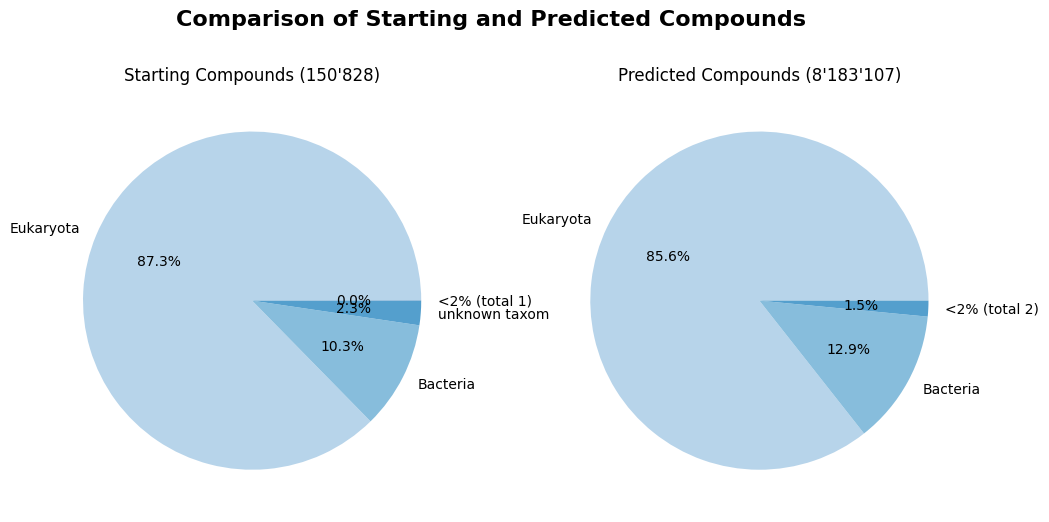

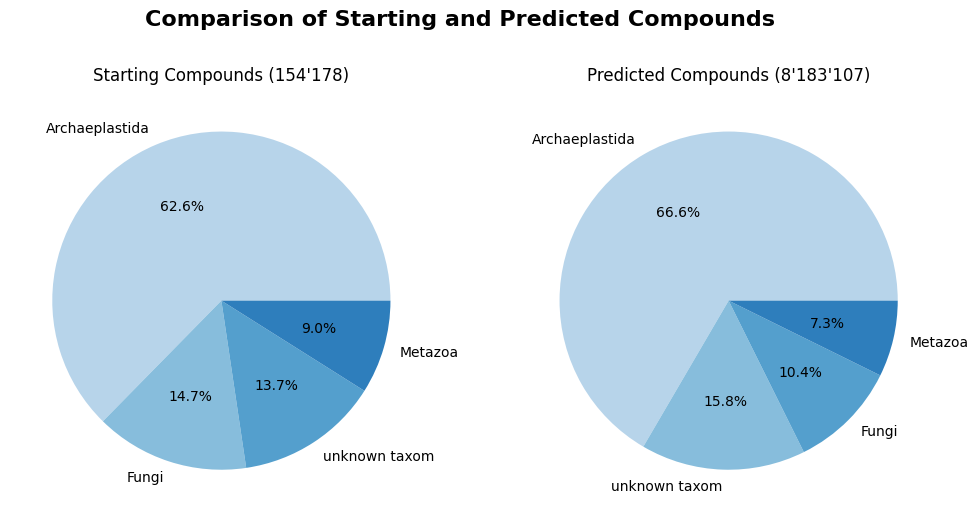

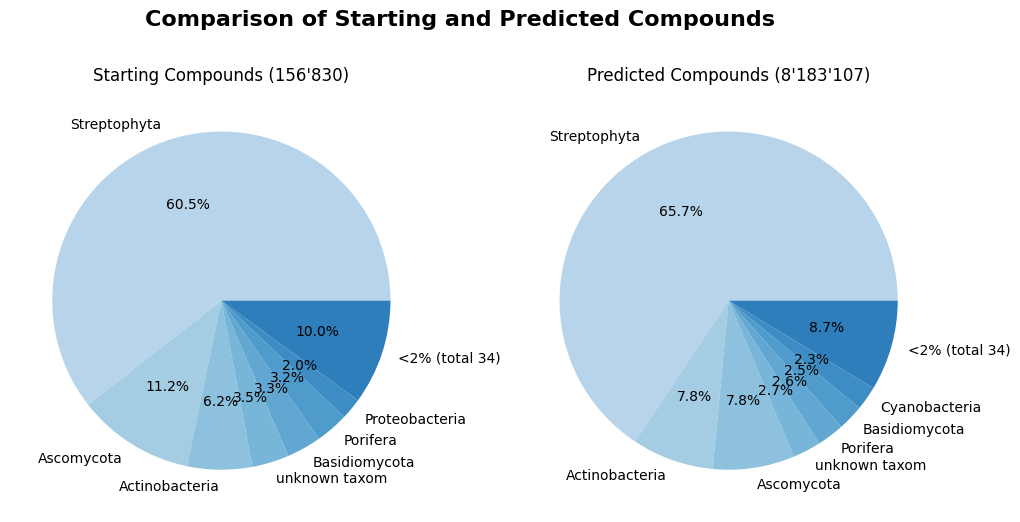

In [77]:
# Specify the folder where your parquet files are located
folder_path = '../data/taxonomy/'

# Iterate over each parquet file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.parquet'):
        file_path = os.path.join(folder_path, file_name)
        
        # Load the parquet file into a DataFrame using polars
        df = pl.read_parquet(file_path)
        
        # Identify the last column (since the name can be different)
        last_column = df.columns[-1]

        # First subplot: Group by starting_compounds
        df_grouped_starting = (
            df.group_by('starting_compounds_ID', maintain_order=True)
            .agg([
                pl.col(last_column).unique()  # Aggregate and keep only unique values
            ])
        )
        df_grouped_starting = df_grouped_starting.explode(last_column)
        
        # Second subplot: Group by predicted_compounds
        df_grouped_predicted = df.select(pl.col(["predicted_compounds_ID", last_column]))
        
        
        plot_circle_plots("Comparison of Starting and Predicted Compounds", df_grouped_starting[:,1], df_grouped_predicted[:,1])


        #plot_frequency(df_grouped_starting, last_column)
        #plot_frequency(df_grouped_predicted, last_column)

        
        #print(f"starting df: {df_grouped_starting.head()} | {df_grouped_starting.shape[0]:_}")
        #print(f"predicted df: {df_grouped_predicted.head()} | {df_grouped_predicted.shape[0]:_}")

In [18]:
len(df_grouped_starting[:,1].shape)


1

['Chordata', 'Rhodophyta', 'Bacteroidetes', None, 'Amoebozoa', 'Cercozoa', 'Metamonada', 'Basidiomycota', 'Mollusca', 'Euglenida', 'Echinodermata', 'Verrucomicrobia', 'Euryarchaeota', 'Streptophyta', 'Cyanobacteria', 'Hemichordata', 'Bacillariophyta', 'Ciliophora', 'Chlorobi', 'Apicomplexa', 'Foraminifera', 'Cnidaria', 'Chlorophyta', 'Glomeromycota', 'Firmicutes', 'Cryptophyceae', 'Platyhelminthes', 'Tenericutes', 'Spirochaetae', 'Actinobacteria', 'Arthropoda', 'Ascomycota', 'Crenarchaeota', 'Nematoda', 'Deinococcus-Thermus', 'Porifera', 'Bryozoa', 'Proteobacteria', 'Chloroflexi', 'Annelida', 'Brachiopoda']


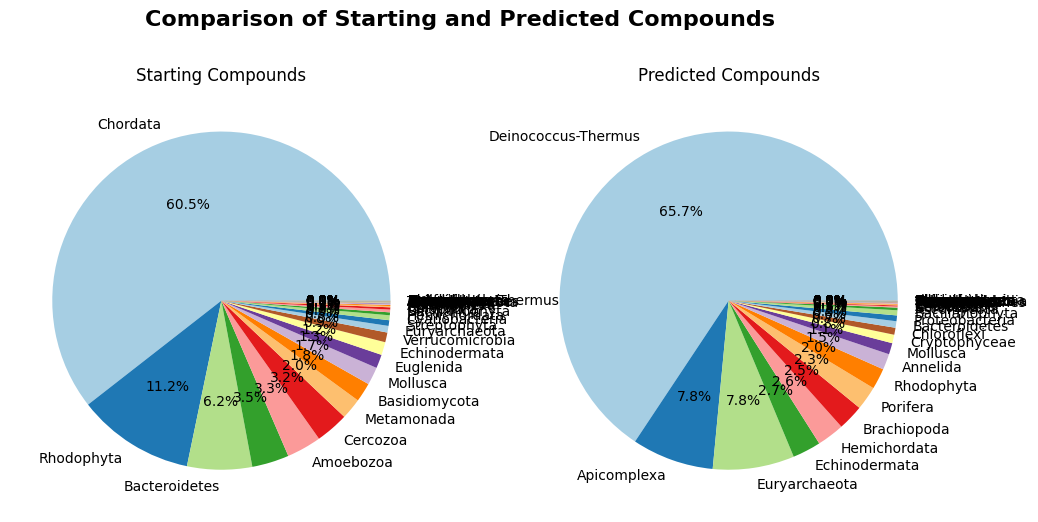

In [65]:
import matplotlib.pyplot as plt
import polars as pl

def plot_circle_plots(title, df_starting, df_predicted):
    # Ensure the input dataframes are one-dimensional and contain categorical data
    if len(df_starting.shape) != 1 or len(df_predicted.shape) != 1:
        raise ValueError("Both dataframes should have exactly one column with categorical data.")

    labelname_starting = df_starting.name
    labelname_predicted = df_predicted.name
    
    # Convert the series to value counts
    starting_counts = df_starting.value_counts(sort=True, name="counts")
    predicted_counts = df_predicted.value_counts(sort=True, name="counts")

    # Extract the labels and counts for pie charts
    starting_labels = starting_counts[labelname_starting].unique().to_list()
    starting_values = starting_counts['counts'].to_list()

    print(starting_labels)
    
    predicted_labels = predicted_counts[labelname_predicted].unique().to_list()
    predicted_values = predicted_counts['counts'].to_list()
    
    # Create the figure and two subplots for pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot the pie chart for the starting compounds
    ax1.pie(starting_values, labels=starting_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    ax1.set_title("Starting Compounds")
    
    # Plot the pie chart for the predicted compounds
    ax2.pie(predicted_values, labels=predicted_labels, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    ax2.set_title("Predicted Compounds")
    
    # Add the main title
    plt.suptitle(title, fontsize=16, fontweight='bold')
    
    # Show the plot
    plt.show()


plot_circle_plots("Comparison of Starting and Predicted Compounds", df_grouped_starting[:,1], df_grouped_predicted[:,1])


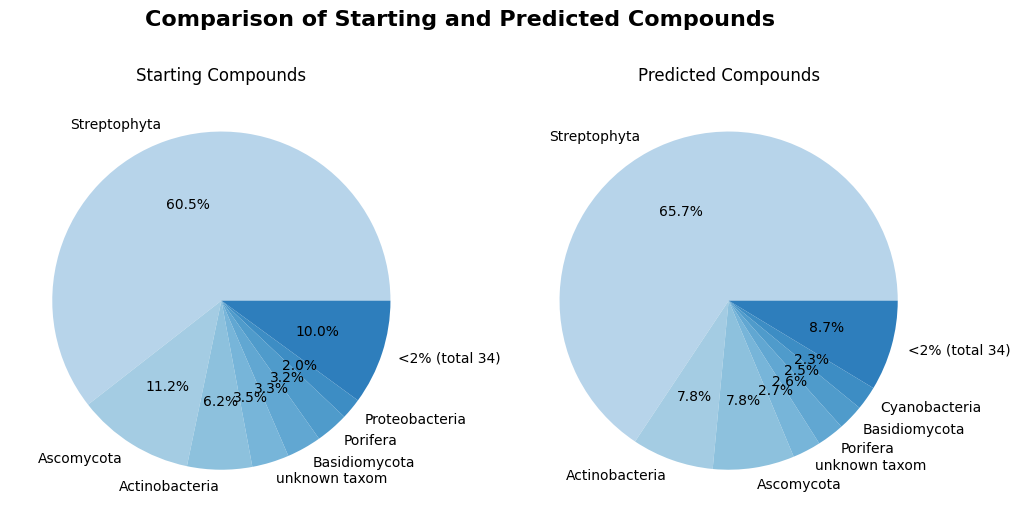

In [78]:
import matplotlib.pyplot as plt
import polars as pl

def plot_circle_plots(title, df_starting, df_predicted):
    # Ensure the input dataframes are one-dimensional and contain categorical data
    if len(df_starting.shape) != 1 or len(df_predicted.shape) != 1:
        raise ValueError("Both dataframes should have exactly one column with categorical data.")

    # Replace null entries with "unknown"
    df_starting = df_starting.fill_null("unknown taxom")
    df_predicted = df_predicted.fill_null("unknown taxom")
    
    labelname_starting = df_starting.name
    labelname_predicted = df_predicted.name
    
    # Convert the series to value counts
    starting_counts = df_starting.value_counts(sort=True, name="counts")
    predicted_counts = df_predicted.value_counts(sort=True, name="counts")

    # Extract the labels and counts for pie charts
    def filter_small_categories(counts: pl.DataFrame, labelname: str) -> (list, list):
        total = counts['counts'].sum()
        threshold = 0.02 * total
        
        # Filter large categories
        large_categories = counts.filter(pl.col('counts') > threshold)
        
        # Filter small categories
        small_categories = counts.filter(pl.col('counts') <= threshold)
        
        num_small_categories = small_categories.shape[0]
        
        # Combine small categories into a single "<2%" category
        if num_small_categories > 0:
            # Create DataFrame for "<2%" category with the same schema
            small_summary = pl.DataFrame({
                labelname: [f"<2% (total {num_small_categories})"],
                "counts": [small_categories['counts'].sum()]
            }, schema={labelname: pl.Utf8, "counts": pl.UInt32})
            
            # Stack DataFrames
            large_categories = large_categories.vstack(small_summary)
        
        labels = large_categories[labelname].to_list()
        values = large_categories['counts'].to_list()
        
        return labels, values
    
    starting_labels, starting_values = filter_small_categories(starting_counts, labelname_starting)
    predicted_labels, predicted_values = filter_small_categories(predicted_counts, labelname_predicted)
    
    # Define a blue color palette
    blue_palette = plt.cm.Blues(np.linspace(0.3, 0.7, len(starting_labels)))
    
    # Create the figure and two subplots for pie charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Update titles with the number of categories
    starting_title = f"Starting Compounds" #({len(df_starting):,})".replace(',', "'")
    predicted_title = f"Predicted Compounds" #({len(df_predicted):,})".replace(',', "'")
    
    # Plot the pie chart for the starting compounds
    ax1.pie(starting_values, labels=starting_labels, autopct='%1.1f%%', colors=blue_palette)
    ax1.set_title(starting_title)
    
    # Plot the pie chart for the predicted compounds
    ax2.pie(predicted_values, labels=predicted_labels, autopct='%1.1f%%', colors=blue_palette)
    ax2.set_title(predicted_title)
    
    # Add the main title
    plt.suptitle(title, fontsize=16, fontweight='bold')
    
    # Show the plot
    plt.show()

# Example usage
# Assuming df_grouped_starting and df_grouped_predicted are defined DataFrames
plot_circle_plots("Comparison of Starting and Predicted Compounds", df_grouped_starting[:,1], df_grouped_predicted[:,1])
